In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.1.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.



   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.8 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.8 kB 219.4 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.8 kB 273.8 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.8 kB 328.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.8 kB 364.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.8 kB 361.0 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.8 kB 361.0 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.8 kB 361.0 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/301.8 kB 351.5 kB/s eta 0:00:01
 

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart.csv')

# Display the first few rows
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  

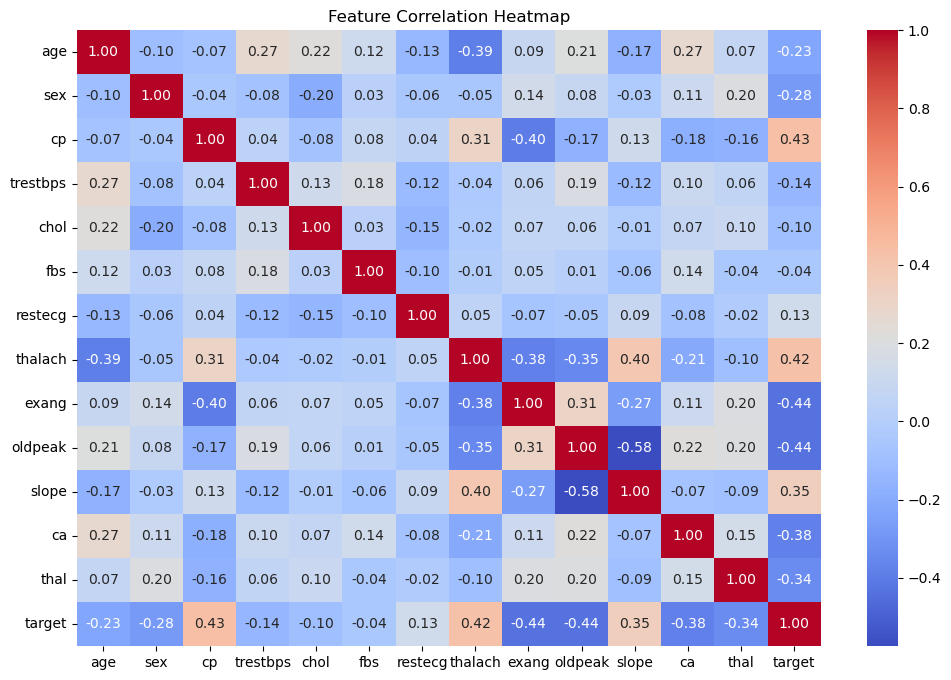

In [4]:
# Check for missing values
print(data.isnull().sum())

# Check basic statistics
print(data.describe())

# Visualize correlations between features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [5]:
# Define features (Xx and target (y)
x = data.drop('target', axis=1)  # Drop the target column from features
y = data['target']              # Target column (1: Heart disease, 0: No heart disease)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = rf_model.predict(x_test)

# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



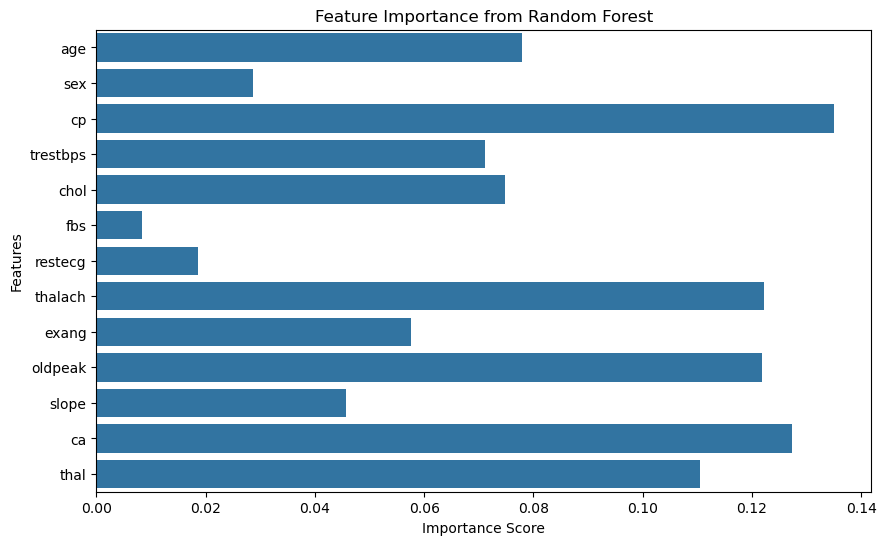

In [8]:
# Get feature importances
feature_importances = rf_model.feature_importances_
features = x.columns

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print("Best Model Accuracy:", accuracy_score(y_test, best_model.predict(x_test)))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Accuracy: 0.9853658536585366


In [10]:
import joblib

joblib.dump(rf_model, 'heart_disease_rf_model.pkl')

['heart_disease_rf_model.pkl']

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  

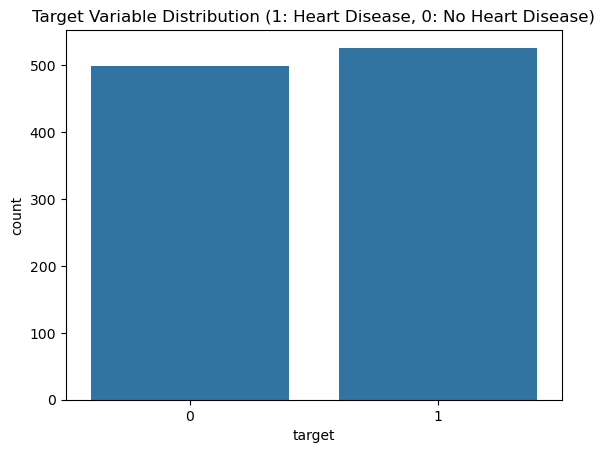

In [11]:
print(data.isnull().sum())

# Check basic statistics
print(data.describe())

# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=data)
plt.title("Target Variable Distribution (1: Heart Disease, 0: No Heart Disease)")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (x) and target (y)
x = data.drop('target', axis=1)  # Features
y = data['target']              # Target

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features (KNN requires scaled data)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with k=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = knn.predict(x_test)

# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8341463414634146
Confusion Matrix:
 [[79 23]
 [11 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



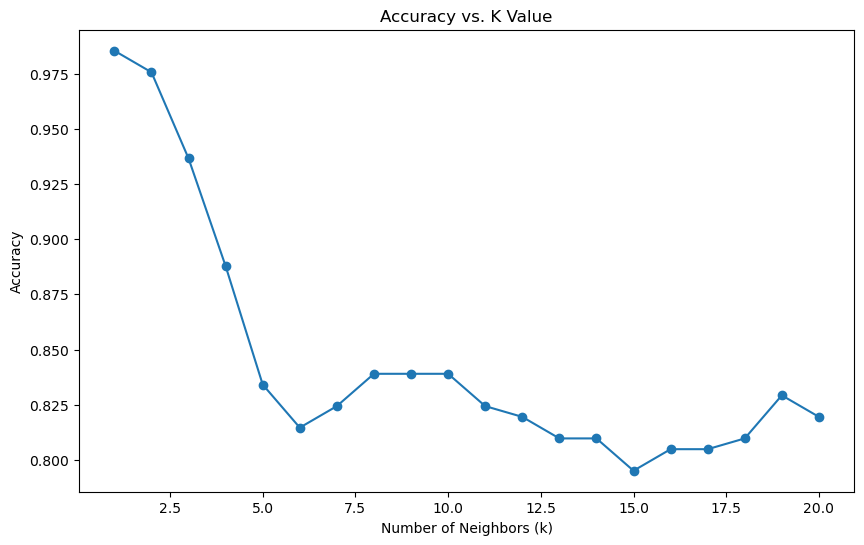

Best k value: 1


In [15]:
# Try different values of k
accuracies = []

for k in range(1, 21):  # Test k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o')
plt.title("Accuracy vs. K Value")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.show()

# Find the best k
best_k = accuracies.index(max(accuracies)) + 1
print("Best k value:", best_k)

In [16]:
# Train KNN with the best k
knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(x_train, y_train)

# Evaluate the optimized model
y_pred_optimized = knn_optimized.predict(x_test)

# Accuracy
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))

Optimized Accuracy: 0.9853658536585366


In [17]:
import joblib

joblib.dump(rf_model, 'heart_disease_rf and knn_model.pkl')


['heart_disease_rf and knn_model.pkl']